In [109]:

class Mydataset(Dataset):
    def __init__(self, root_dir = 'flood/', train = True, transforms = None):
        super(Mydataset, self).__init__()
        self.train = train
        self.transforms = transforms
        
        # 파일 경로 지정
        file_path = os.path.join(root_dir, 'train')
        file_mask_path = os.path.join(root_dir, 'masked')
        
        # 이미지 리스트 생성
        self.images = sorted([os.path.join(file_path, img) for img in os.listdir(file_path)])
        self.masks = sorted([os.path.join(file_mask_path, mask) for mask in os.listdir(file_mask_path)])
        
        # train, valid 데이터 분리
        split_ratio = int(len(self.images) * 0.8)
        if train:
            self.images = self.images[:split_ratio]
            self.masks = self.masks[:split_ratio] # train은 80%
        else:
            self.images = self.images[split_ratio:]
            self.masks = self.masks[split_ratio:] # valid는 20%
            
    def __getitem__(self, index: int):
        original = Image.open(self.images[index]).convert('RGB') # index 번째의 이미지를 RGB 형식으로 열음
        masked = Image.open(self.masks[index]).convert('L') # 얘는 마스크를 L(grayscale) 형식으로 열음
        
        if self.transforms: # 나중에 image augmentation에 사용됨
            original = self.transforms(original)
            masked = self.transforms(masked)
            
        return {'img' : original, 'mask' : masked} # transform이 적용된 후 텐서를 반환
    
    def __len__(self):
        return len(self.images) # 이미지의 파일 수를 반환함 -> train = True라면 train 데이터셋의 크기를, False라면 valid 데이터셋의 크기를 반환
    

In [96]:

# ------------------------ data loader 정의하기 ------------------------ #
width = 360
height = 240
batch_size = 16
n_workers = 2

transforms = T.Compose([
    T.Resize((width, height)),
    T.ToTensor(),
])

train_dataset = Mydataset(root_dir = "flood/",
                          train = True,
                          transforms = transforms)

train_dataset_loader = DataLoader(dataset = train_dataset,
                                  batch_size = batch_size,
                                  shuffle = True,
                                  num_workers = n_workers)

In [100]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils


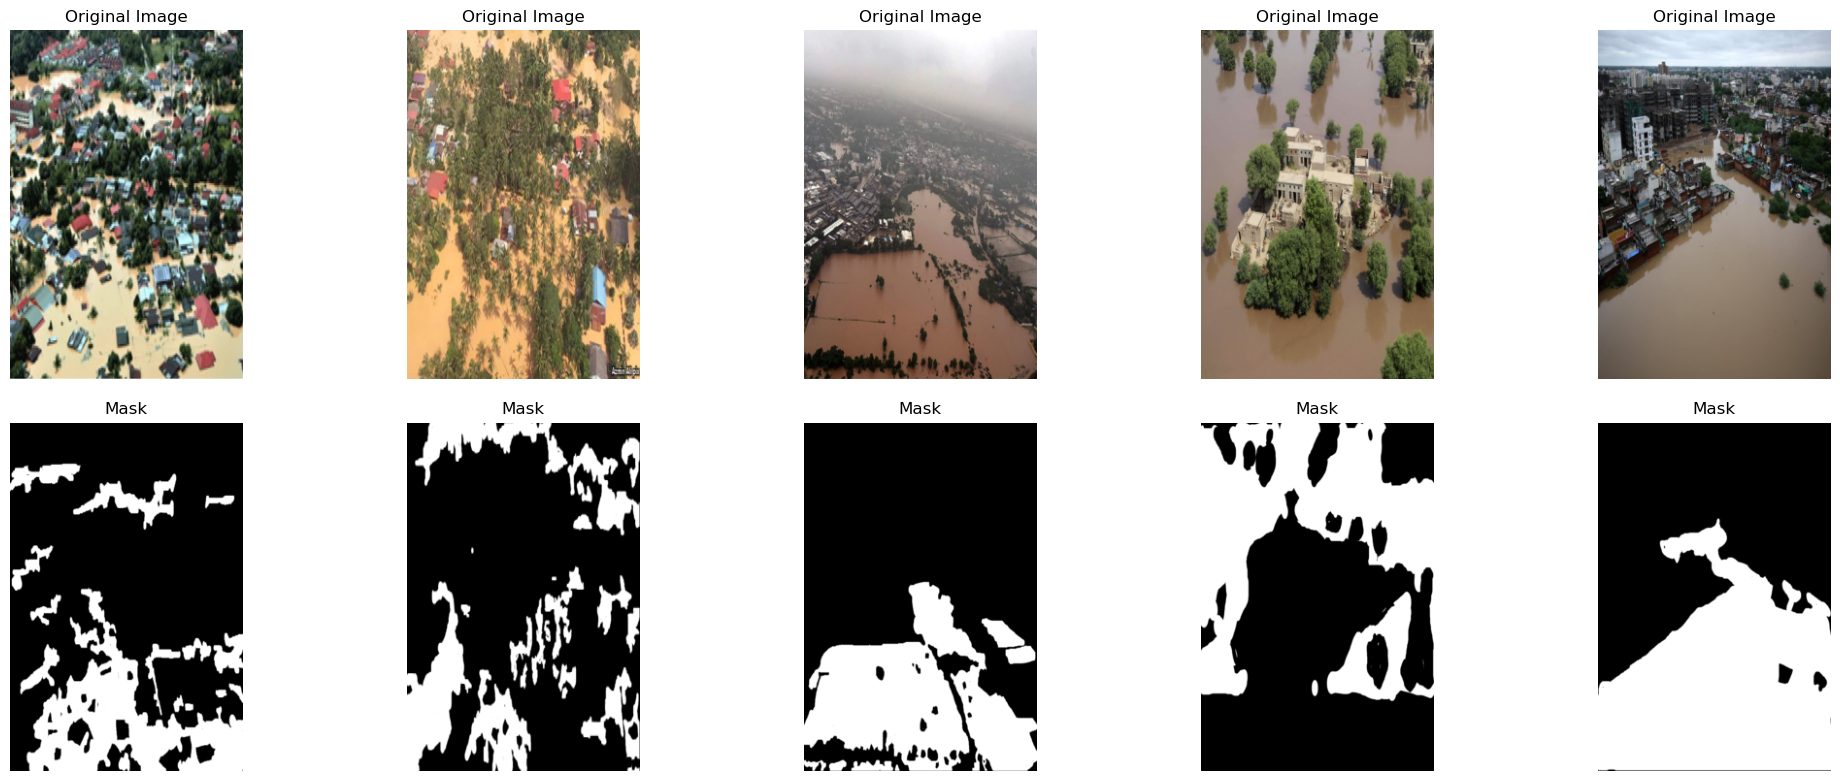

In [110]:

train_dataset = Mydataset(root_dir="flood/", train=True, transforms=transforms)
train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=n_workers)

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout()

for i in range(5):
    sample = train_dataset[i]
    img = sample['img']
    mask = sample['mask']
    
    # Plot original image
    ax = axes[0, i]
    ax.axis('off')
    ax.set_title('Original Image')
    ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    
    # Plot mask
    ax = axes[1, i]
    ax.axis('off')
    ax.set_title('Mask')
    ax.imshow(mask.numpy()[0], cmap='gray')

plt.show()